In [202]:
import pandas as pd
import numpy as np
from sklearn import multiclass,feature_extraction,feature_selection
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,cross_val_score,RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,HistGradientBoostingClassifier,BaggingClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
import joblib, scipy, sklearn
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

In [124]:
df=pd.read_csv('cirrhosis.csv')

In [125]:
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [126]:
df.tail()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0
417,418,976,C,NaN,19358,F,NaN,NaN,NaN,N,0.7,NaN,3.29,NaN,NaN,NaN,NaN,350.0,10.6,4.0


In [127]:
df.isnull()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,True,False,False,True,True,True,False,False,True,False,True,True,True,True,False,False,False
414,False,False,False,True,False,False,True,True,True,False,False,True,False,True,True,True,True,False,False,False
415,False,False,False,True,False,False,True,True,True,False,False,True,False,True,True,True,True,False,False,False
416,False,False,False,True,False,False,True,True,True,False,False,True,False,True,True,True,True,False,False,False


In [128]:
df.drop(['ID'],axis=1,inplace=True)

In [129]:
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [130]:
df.shape

(418, 19)

In [131]:
df.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Status         418 non-null    object 
 2   Drug           312 non-null    object 
 3   Age            418 non-null    int64  
 4   Sex            418 non-null    object 
 5   Ascites        312 non-null    object 
 6   Hepatomegaly   312 non-null    object 
 7   Spiders        312 non-null    object 
 8   Edema          418 non-null    object 
 9   Bilirubin      418 non-null    float64
 10  Cholesterol    284 non-null    float64
 11  Albumin        418 non-null    float64
 12  Copper         310 non-null    float64
 13  Alk_Phos       312 non-null    float64
 14  SGOT           312 non-null    float64
 15  Tryglicerides  282 non-null    float64
 16  Platelets      407 non-null    float64
 17  Prothrombin    416 non-null    float64
 18  Stage     

In [133]:
df[df.duplicated()]

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage


In [134]:
df.skew()

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



N_Days           0.472602
Age              0.086850
Bilirubin        2.717611
Cholesterol      3.408526
Albumin         -0.467527
Copper           2.303640
Alk_Phos         2.992834
SGOT             1.449197
Tryglicerides    2.523902
Platelets        0.627098
Prothrombin      2.223276
Stage           -0.496273
dtype: float64

N_Days
Skewness: 0.4726020506759292
Kurtosis: -0.4821388331042038


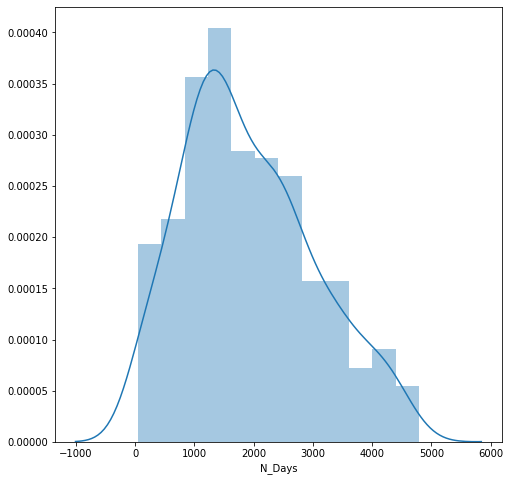

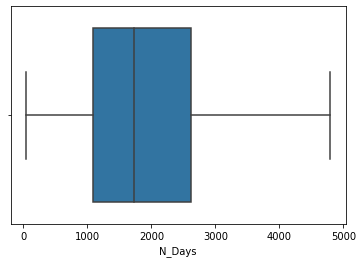

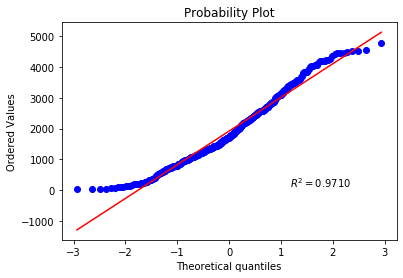

----------------------------
Age
Skewness: 0.08685015608405514
Kurtosis: -0.616730132346194


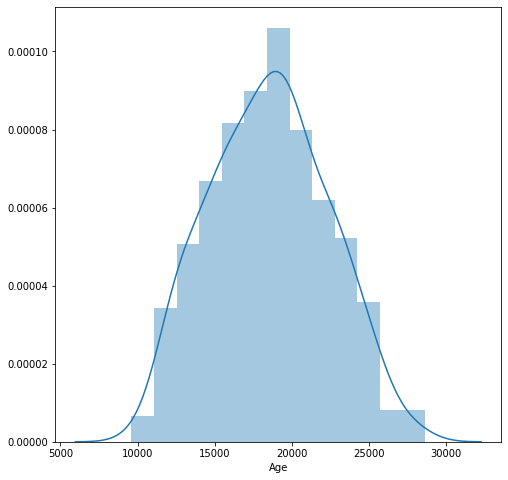

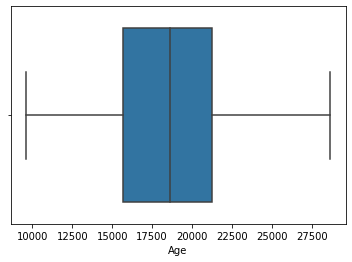

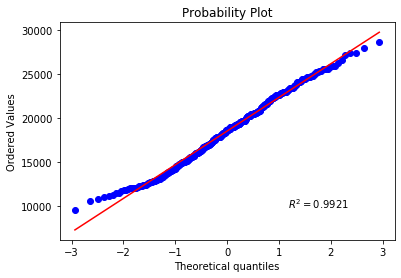

----------------------------
Bilirubin
Skewness: 2.717610708740455
Kurtosis: 8.065335678744502


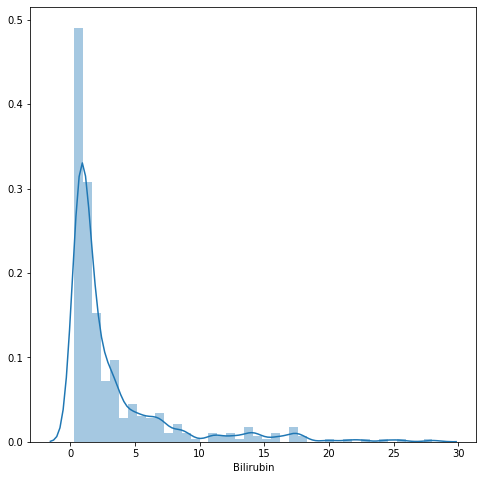

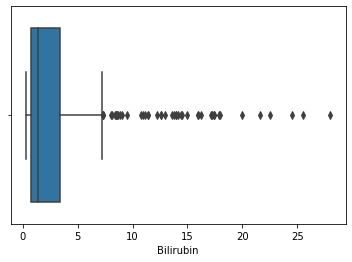

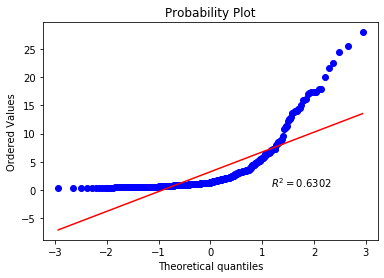

----------------------------
Cholesterol
Skewness: 3.408525855721416
Kurtosis: 14.337869865983716


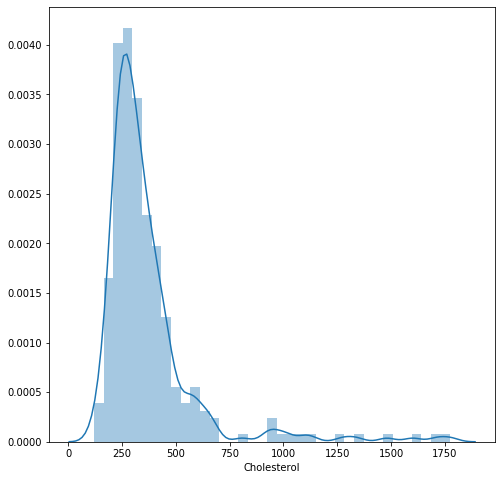

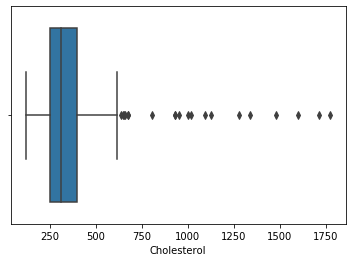

C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2039: RuntimeWarning:

invalid value encountered in less_equal

posx and posy should be finite values
posx and posy should be finite values


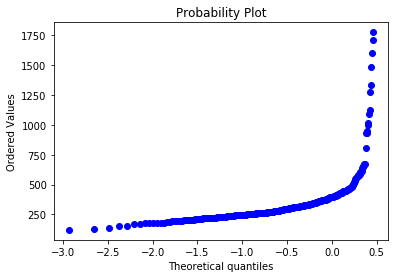

----------------------------
Albumin
Skewness: -0.4675265141762801
Kurtosis: 0.5667445291024173


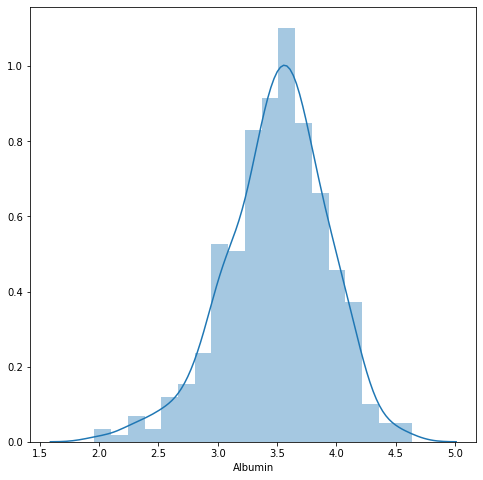

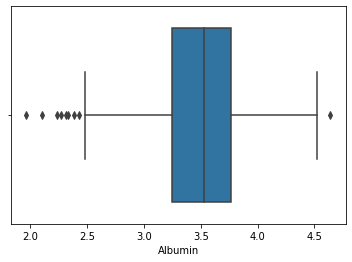

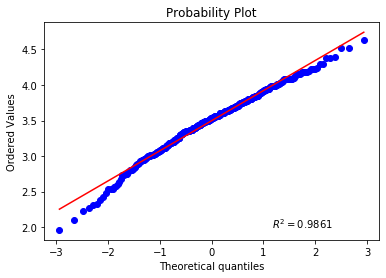

----------------------------
Copper
Skewness: 2.3036399957832616
Kurtosis: 7.624023449861701


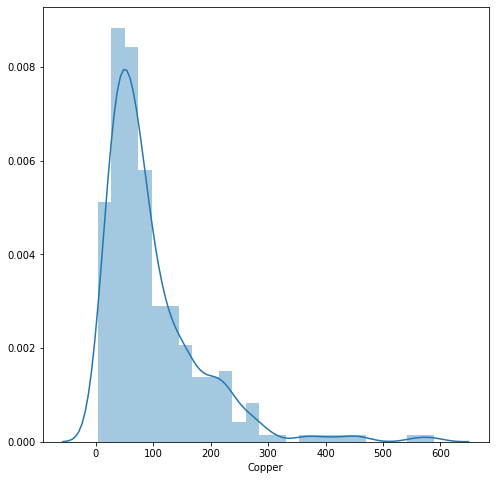

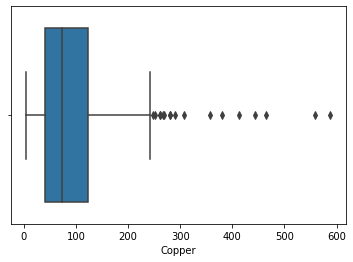

C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2039: RuntimeWarning:

invalid value encountered in less_equal

posx and posy should be finite values
posx and posy should be finite values


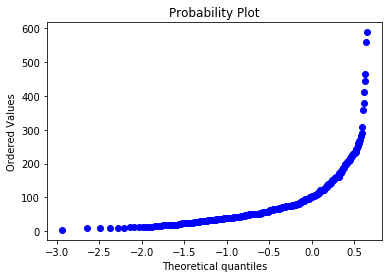

----------------------------
Alk_Phos
Skewness: 2.9928343153496115
Kurtosis: 9.662553460966153


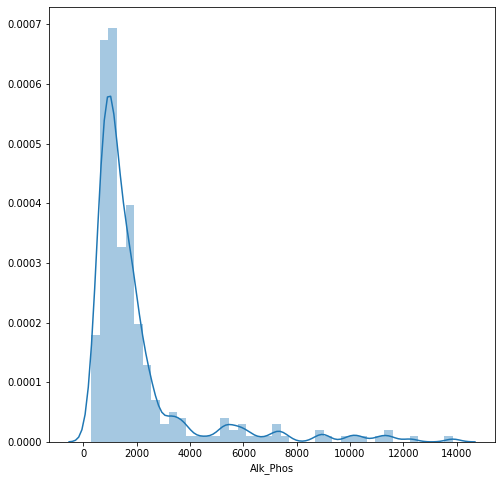

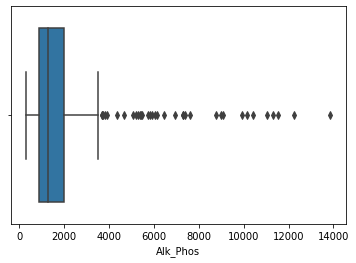

C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2039: RuntimeWarning:

invalid value encountered in less_equal

posx and posy should be finite values
posx and posy should be finite values


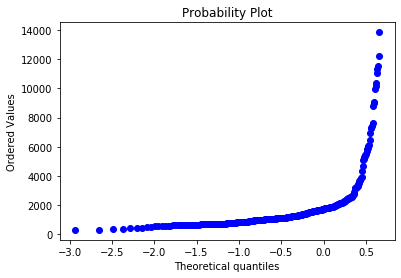

----------------------------
Sgot
Skewness: 1.4491969235882083
Kurtosis: 4.311975857605217


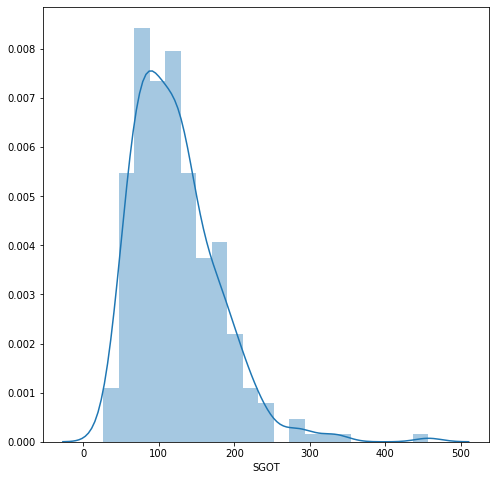

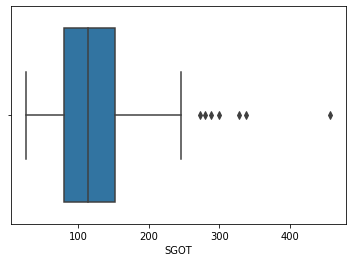

C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2039: RuntimeWarning:

invalid value encountered in less_equal

posx and posy should be finite values
posx and posy should be finite values


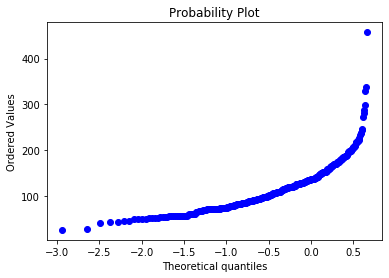

----------------------------
Tryglicerides
Skewness: 2.5239024664577845
Kurtosis: 11.802753128498216


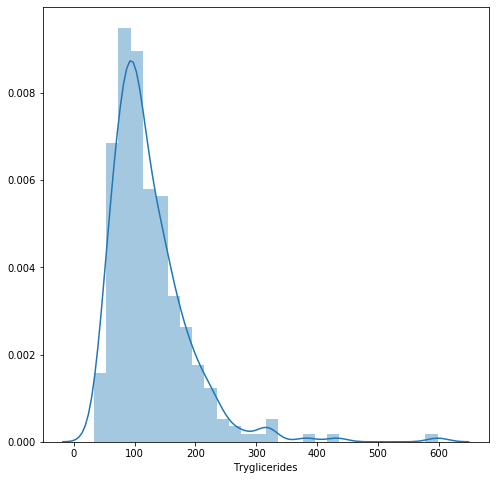

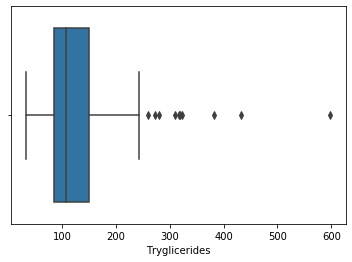

C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2039: RuntimeWarning:

invalid value encountered in less_equal

posx and posy should be finite values
posx and posy should be finite values


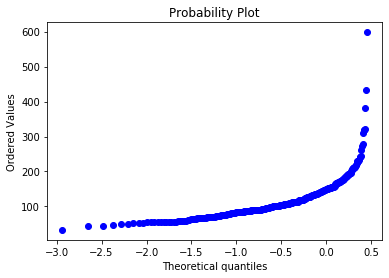

----------------------------
Platelets
Skewness: 0.6270977603715678
Kurtosis: 0.8630445578915271


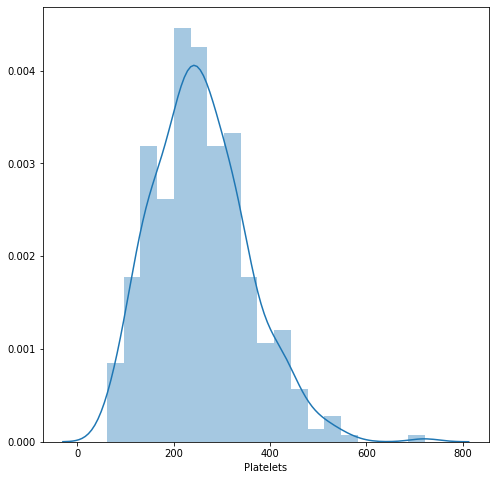

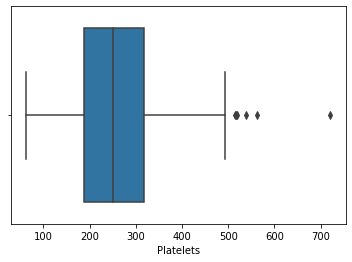

C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2039: RuntimeWarning:

invalid value encountered in less_equal

posx and posy should be finite values
posx and posy should be finite values


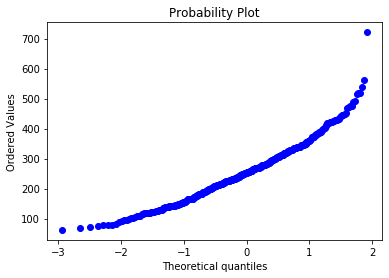

----------------------------
Prothrombin
Skewness: 2.223276154109735
Kurtosis: 10.040772735082795


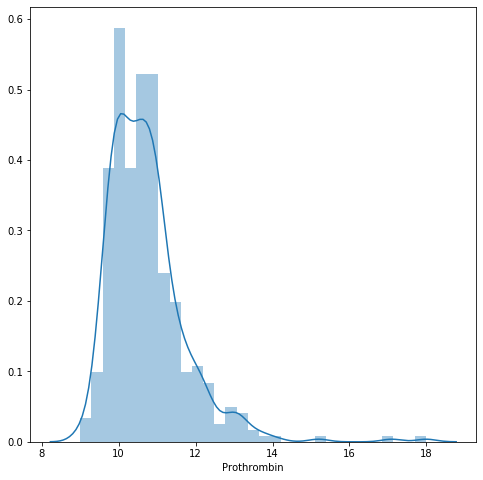

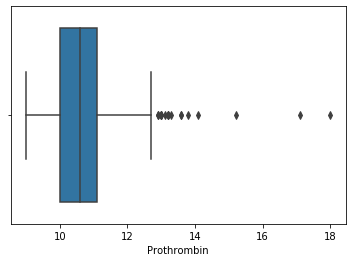

C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2039: RuntimeWarning:

invalid value encountered in less_equal

posx and posy should be finite values
posx and posy should be finite values


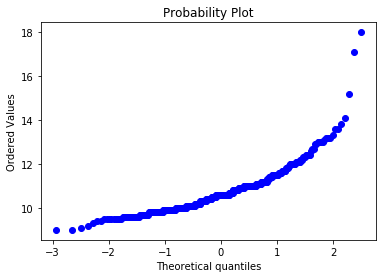

----------------------------


In [135]:
for col in df.columns:
    if df[col].dtypes != 'object':
        if col not in ['Stage']:
            print(col.title())
            print("Skewness:",df[col].skew())
            print("Kurtosis:",df[col].kurtosis())
            plt.figure(figsize=(8,8))
            sns.distplot(df[col])
            plt.show()
            sns.boxplot(df[col])
            plt.show()
            scipy.stats.probplot(df[col],plot=plt,rvalue=True)
            plt.show()
            print('----------------------------')

In [136]:
def pie_chart(df,col):
    labels = df[col].value_counts().keys()
    values = df[col].value_counts().values
    explode = [0]*np.size(labels)
    explode[0] = 0.2
    explode[1] = 0.1
    plt.figure(figsize=(8,8))
    plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.2f%%')
    plt.show()

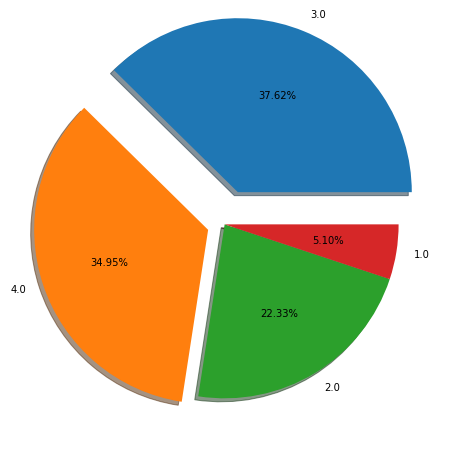

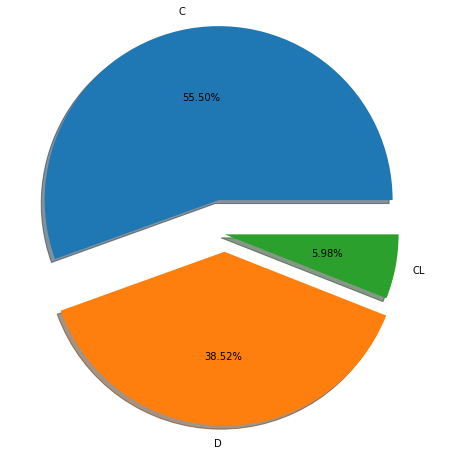

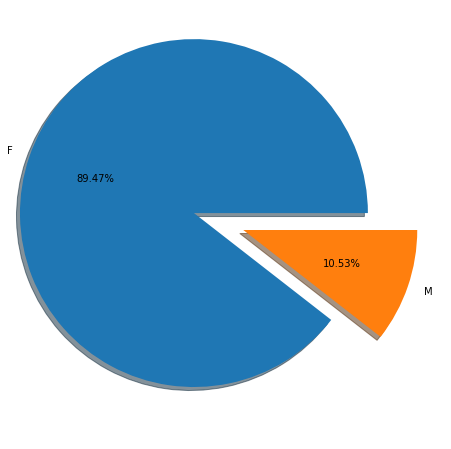

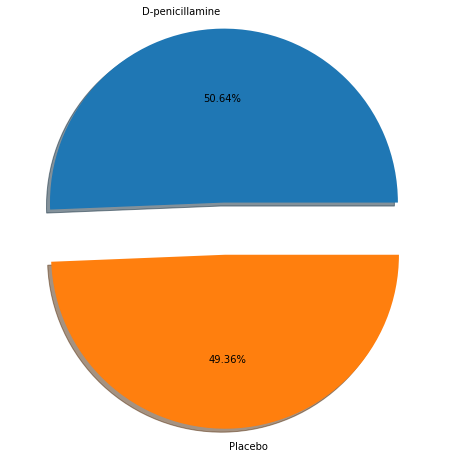

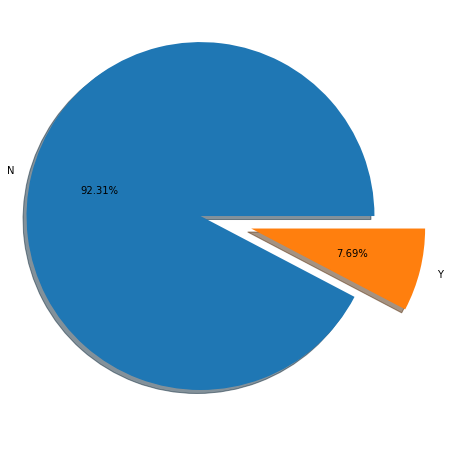

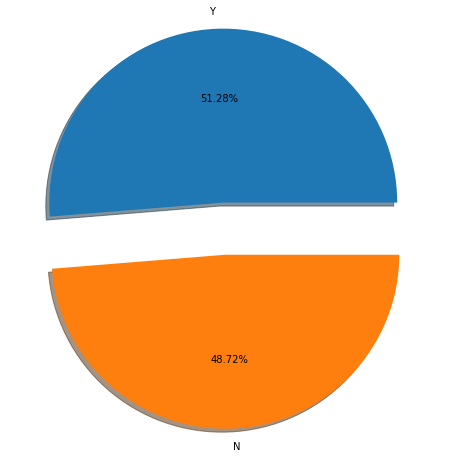

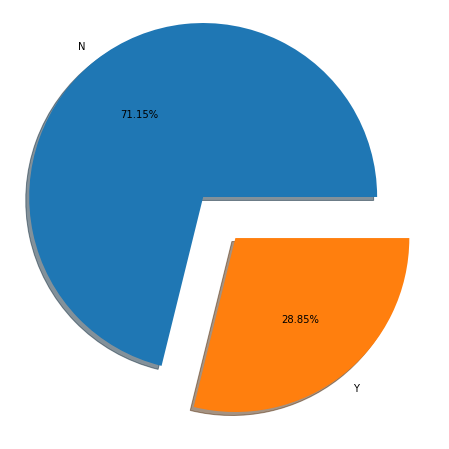

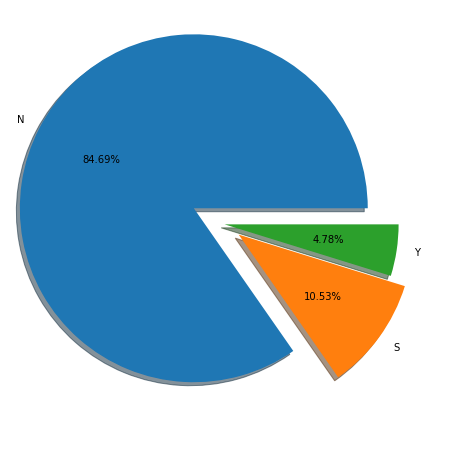

In [137]:
pie_chart(df,'Stage')
pie_chart(df,'Status')
pie_chart(df,'Sex')
pie_chart(df,'Drug')
pie_chart(df,'Ascites')
pie_chart(df,'Hepatomegaly')
pie_chart(df,'Spiders')
pie_chart(df,'Edema')


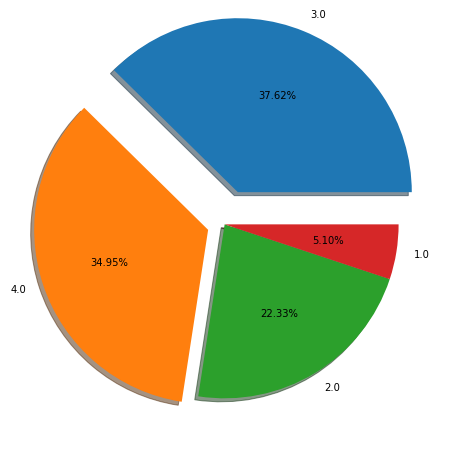

In [138]:
pie_chart(df,'Stage')

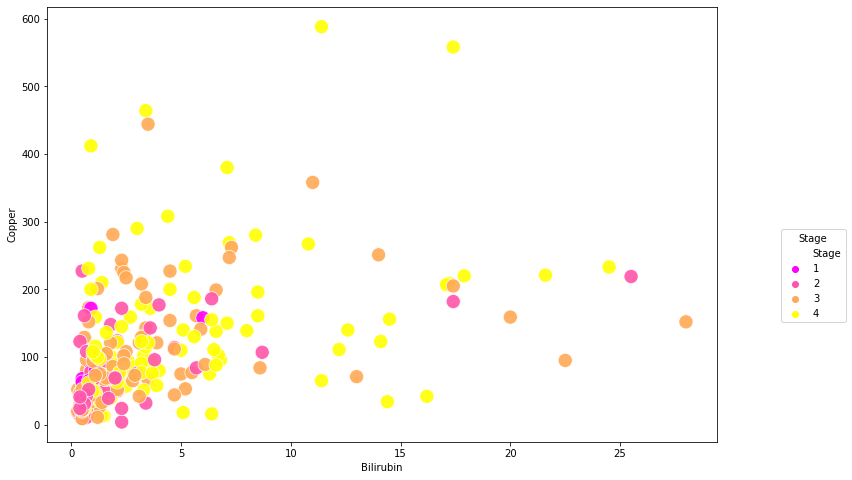

In [139]:

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x='Bilirubin',y='Copper',data=df,hue='Stage',s=200,alpha=0.9,palette='spring')
plt.legend(bbox_to_anchor=(1.2,0.5),title="Stage")

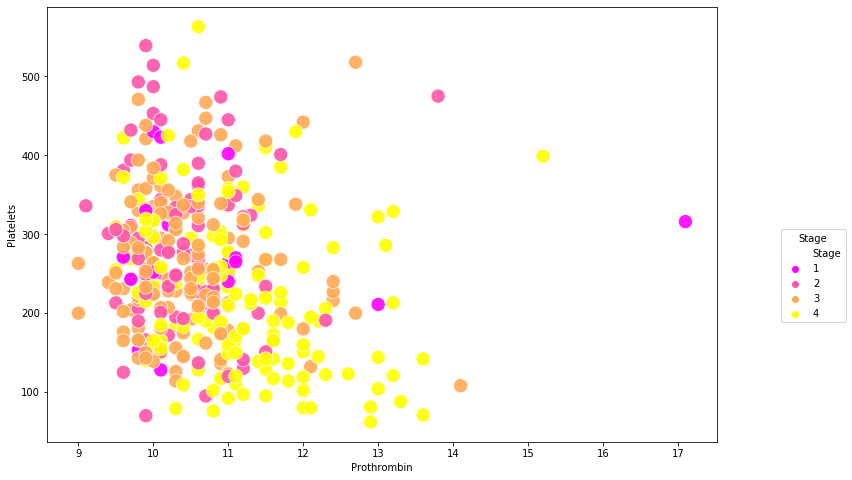

In [140]:

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x='Prothrombin',y='Platelets',data=df,hue='Stage',s=200,alpha=0.9,palette='spring')
plt.legend(bbox_to_anchor=(1.2,0.5),title="Stage")

In [141]:
males=df[df.Sex=='M']
females=df[df.Sex=='F']

In [142]:
males.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,44.000000,44.000000,44.000000,35.000000,44.000000,36.000000,36.000000,36.000000,35.000000,43.000000,44.000000,44.000000
mean,1894.022727,20348.340909,2.865909,362.457143,3.535000,154.277778,2172.950000,121.990556,133.428571,231.139535,10.940909,3.068182
std,1213.034356,4009.641699,2.319477,178.993319,0.456598,100.665389,2418.446239,47.013095,52.168441,85.225634,0.931445,0.925045
min,140.000000,12227.000000,0.600000,151.000000,2.270000,13.000000,516.000000,46.500000,49.000000,70.000000,9.700000,1.000000
25%,1060.750000,17886.000000,1.300000,245.000000,3.327500,80.750000,852.000000,82.770000,91.000000,165.500000,10.275000,2.750000
50%,1507.000000,19724.000000,2.050000,317.000000,3.645000,134.500000,1116.000000,121.675000,126.000000,217.000000,10.900000,3.000000
75%,2715.750000,23588.750000,3.500000,426.500000,3.870000,211.750000,2313.000000,153.450000,163.000000,298.500000,11.225000,4.000000
max,4459.000000,28650.000000,9.500000,1000.000000,4.300000,444.000000,10396.800000,221.880000,242.000000,394.000000,14.100000,4.000000


In [143]:
females.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,374.000000,374.000000,374.000000,249.000000,374.000000,274.000000,276.000000,276.000000,247.000000,364.000000,372.000000,368.000000
mean,1920.577540,18319.823529,3.262567,370.502008,3.493021,90.208029,1957.834783,122.630145,123.465587,260.082418,10.706989,3.019022
std,1092.953174,3740.397415,4.591388,238.726563,0.421527,80.738377,2105.049047,57.916646,66.780963,99.418385,1.030534,0.877926
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1095.500000,15478.750000,0.700000,252.000000,3.240000,40.000000,877.500000,80.600000,84.000000,190.000000,10.000000,2.000000
50%,1773.000000,18333.000000,1.300000,309.000000,3.520000,67.000000,1270.500000,113.335000,106.000000,252.500000,10.600000,3.000000
75%,2606.250000,20819.000000,3.400000,395.000000,3.767500,111.750000,1963.750000,151.900000,146.000000,319.000000,11.100000,4.000000
max,4795.000000,28018.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [144]:
round(males.Status.value_counts()/len(males)*100,2)

D     54.55
C     38.64
CL     6.82
Name: Status, dtype: float64

In [145]:
round(females.Status.value_counts()/len(females)*100,2)

C     57.49
D     36.63
CL     5.88
Name: Status, dtype: float64

##  Men are more likely to have this disease and death rate is high for male. 

In [146]:
round(males.Stage.value_counts()/len(males)*100,2)

4.0    38.64
3.0    36.36
2.0    18.18
1.0     6.82
Name: Stage, dtype: float64

In [147]:
round(females.Stage.value_counts()/len(females)*100,2)

3.0    37.17
4.0    33.96
2.0    22.46
1.0     4.81
Name: Stage, dtype: float64

## Male are having high chances in Stage 3& 4  compared to female 


In [148]:
round(males.Hepatomegaly.value_counts()/len(males)*100,2)

Y    47.73
N    34.09
Name: Hepatomegaly, dtype: float64

In [149]:
round(females.Hepatomegaly.value_counts()/len(females)*100,2)

Y    37.17
N    36.63
Name: Hepatomegaly, dtype: float64

## Male are highly prone to Hepatomegaly 

In [150]:
df.corr

<bound method DataFrame.corr of      N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
0       400      D  D-penicillamine  21464   F       Y            Y       Y   
1      4500      C  D-penicillamine  20617   F       N            Y       Y   
2      1012      D  D-penicillamine  25594   M       N            N       N   
3      1925      D  D-penicillamine  19994   F       N            Y       Y   
4      1504     CL          Placebo  13918   F       N            Y       Y   
..      ...    ...              ...    ...  ..     ...          ...     ...   
413     681      D              NaN  24472   F     NaN          NaN     NaN   
414    1103      C              NaN  14245   F     NaN          NaN     NaN   
415    1055      C              NaN  20819   F     NaN          NaN     NaN   
416     691      C              NaN  21185   F     NaN          NaN     NaN   
417     976      C              NaN  19358   F     NaN          NaN     NaN   

    Edema  Bilirubi

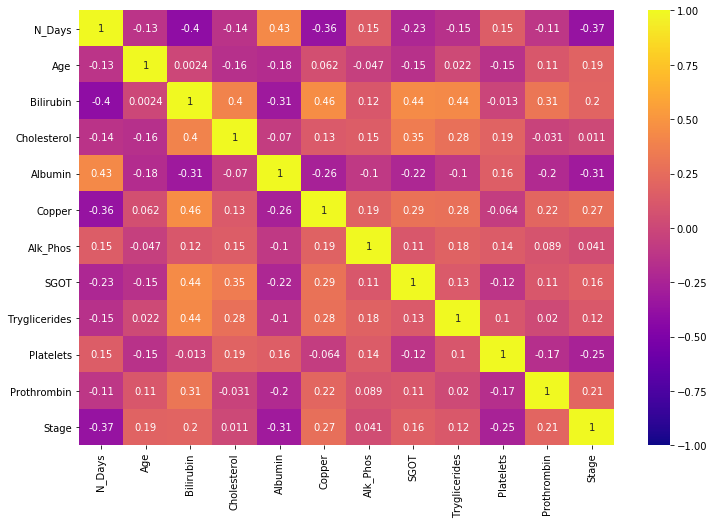

In [151]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='plasma',vmin=-1,vmax=1)

## No major correlation to features

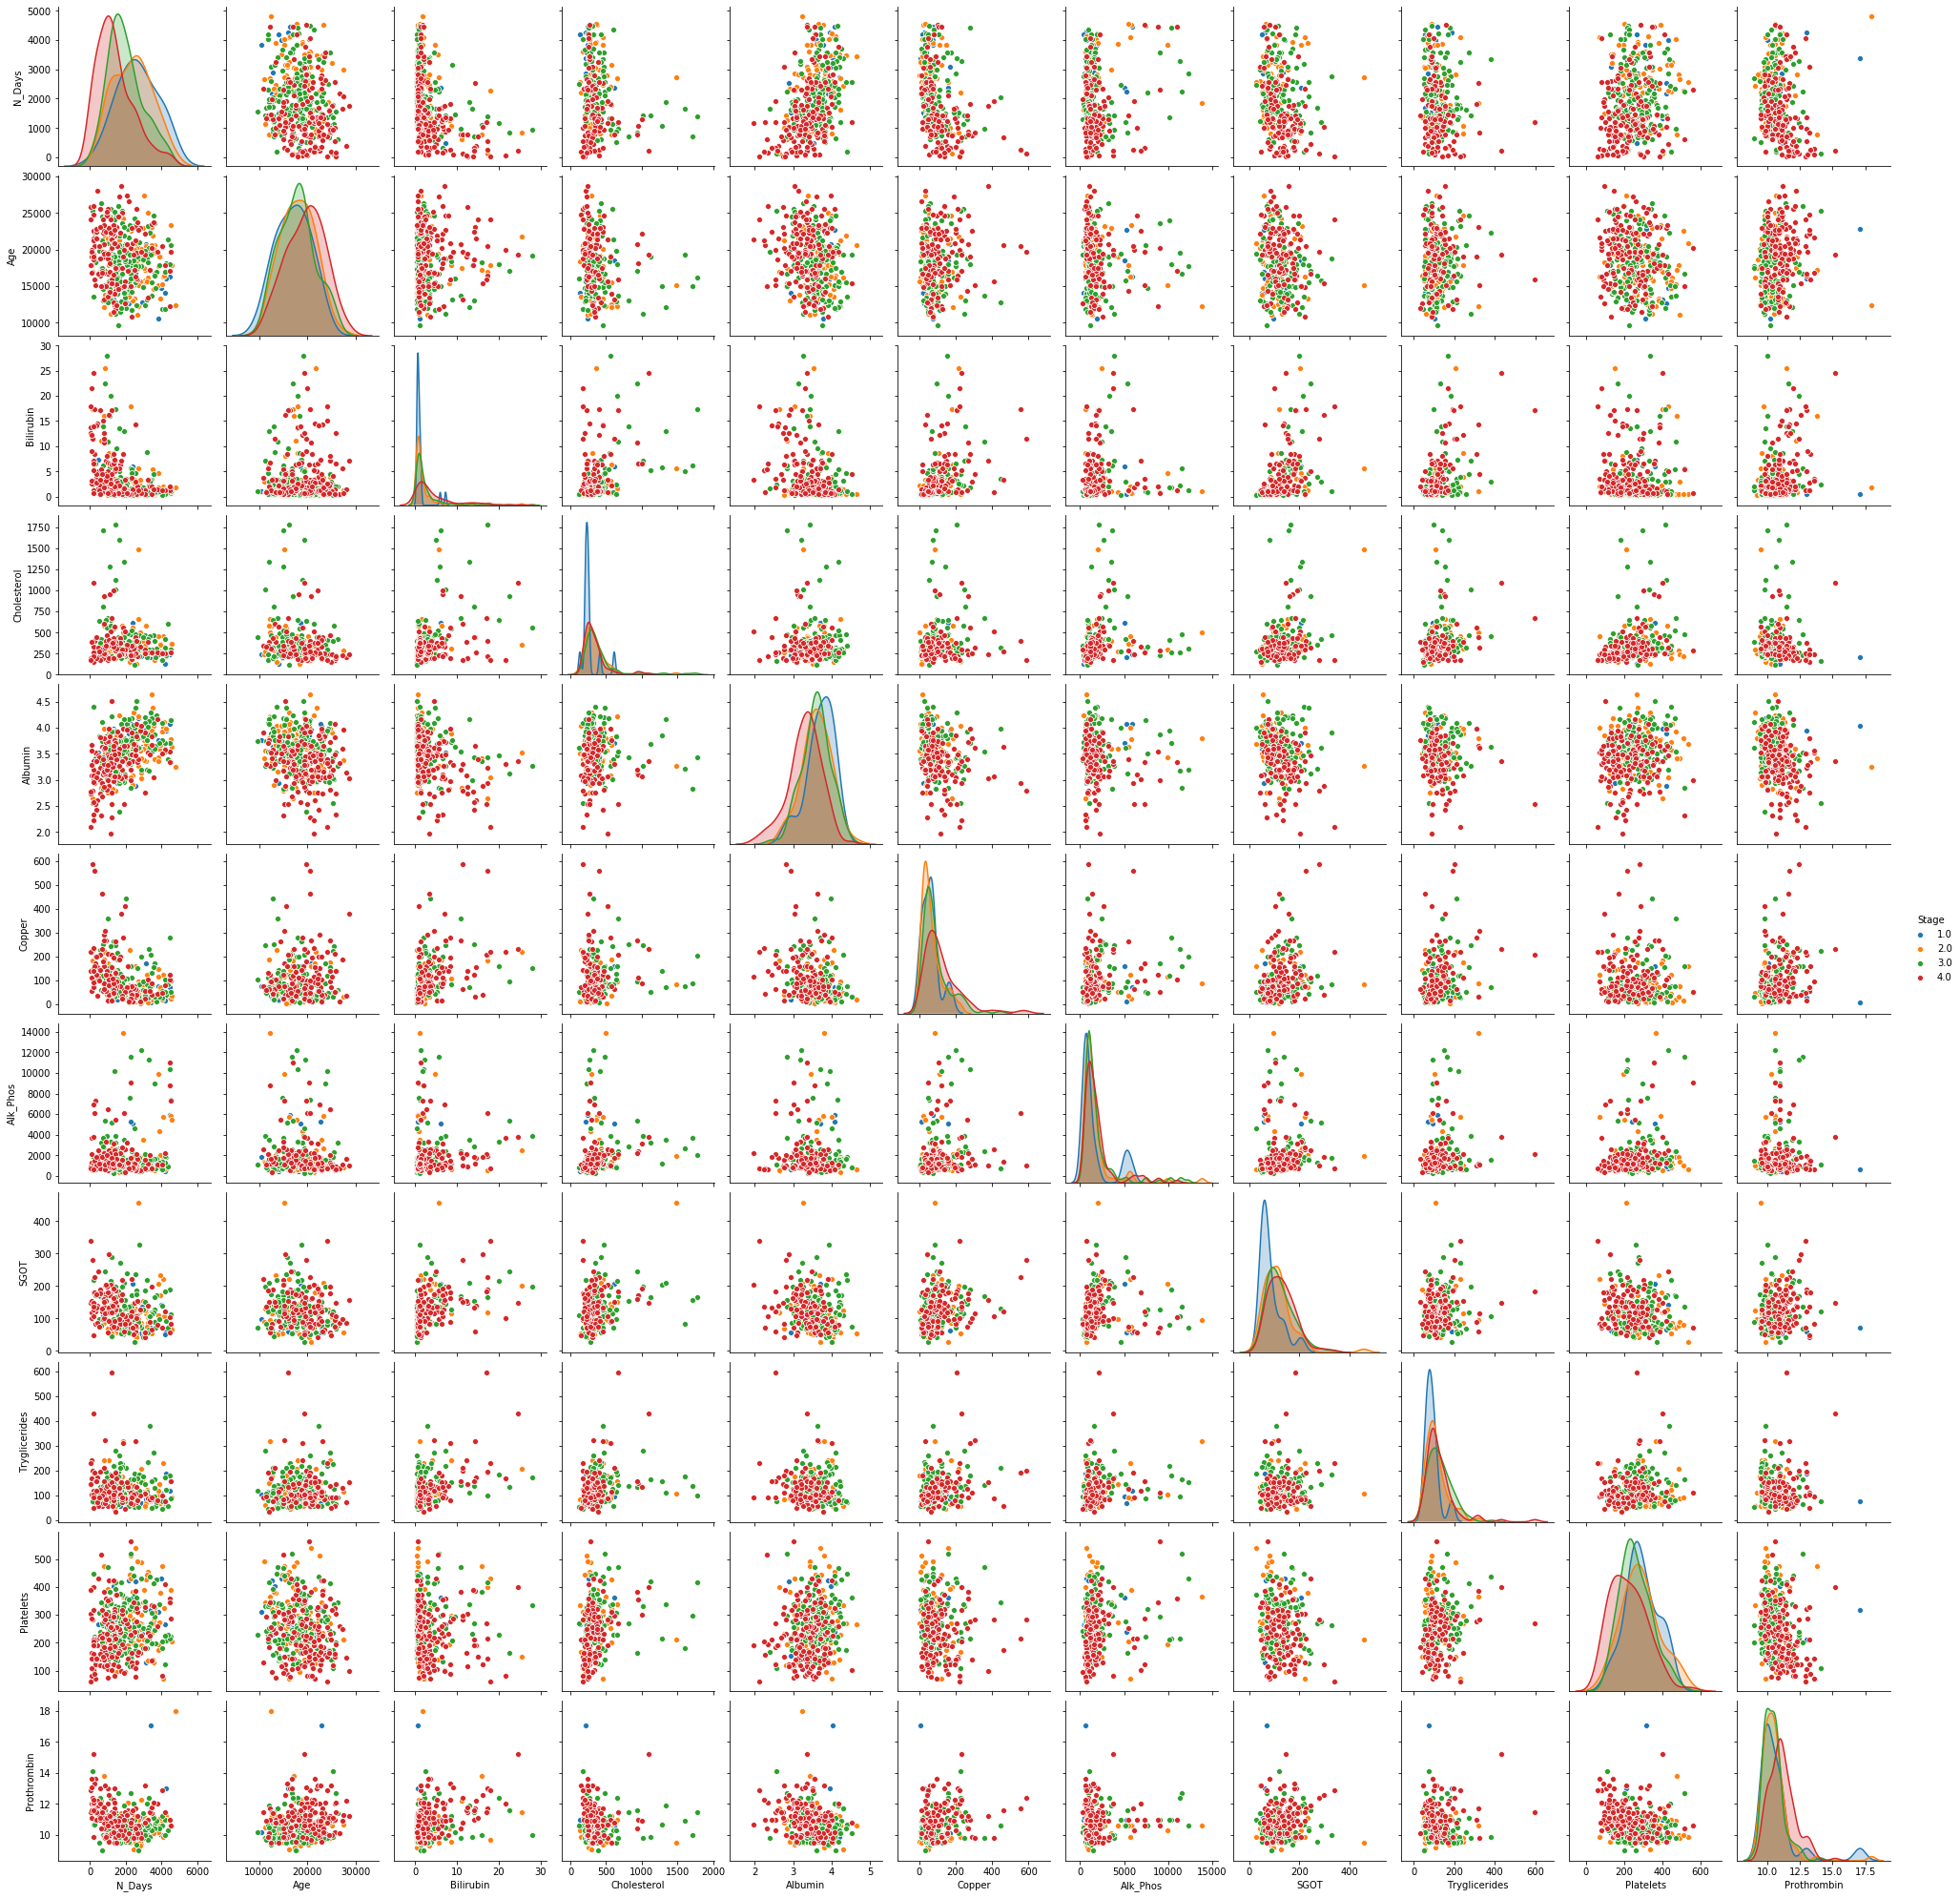

In [152]:
sns.pairplot(df,hue='Stage')

In [153]:
#Synthetic Minority Over-sampling Technique

In [154]:
for col in df.columns:
    if df[col].dtypes != 'object':
        lower_limit, upper_limit = df[col].quantile([0.25,0.75])
        IQR = upper_limit - lower_limit
        lower_whisker = lower_limit - 1.5 * IQR
        upper_whisker = upper_limit + 1.5 * IQR
        df[col] = np.where(df[col]>upper_whisker,upper_whisker,np.where(df[col]<lower_whisker,lower_whisker,df[col]))



In [160]:

for col in df.columns:
    if df[col].dtypes != 'object':
        df[col].fillna(df[col].median(),inplace=True)
    else:
        df[col].fillna(df[col].mode()[0],inplace=True)



In [161]:
df.Sex.replace(['M','F'],[1,0],inplace=True)
df.Sex = df.Sex.astype(np.float64)
df.Edema.replace(['N','S','Y'],[0,-1,1],inplace=True)
df.Edema = df.Edema.astype(np.float64)
df.Ascites.replace(['Y','N'],[1,0],inplace=True)
df.Hepatomegaly.replace(['Y','N'],[1,0],inplace=True)
df.Spiders.replace(['Y','N'],[1,0],inplace=True)
df.Ascites = df.Ascites.astype(np.float64)
df.Hepatomegaly = df.Hepatomegaly.astype(np.float64)
df.Spiders = df.Spiders.astype(np.float64)
df.Drug.replace(['D-penicillamine','Placebo'],[0,1],inplace=True)
df.Drug = df.Drug.astype(np.float64)
df.Stage = df.Stage.astype(np.int64)


In [162]:
X = df.drop(['Stage','N_Days','Status'],axis=1)
y = df.Stage


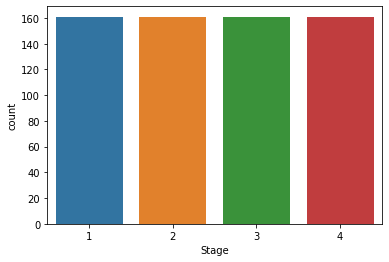

In [163]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X,y = smote.fit_resample(X,y)
sns.countplot(y)

In [165]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = X.columns
X = scaler.fit_transform(X)
X = pd.DataFrame(X,columns=features)
X.head()


,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,-0.707597,0.878741,-0.370424,4.817591,0.935780,2.336387,3.096459,2.333595,-0.618863,-2.449095,1.427023,0.382306,0.616180,1.598222,-0.849660,2.012545
1,-0.707597,0.649729,-0.370424,-0.211479,0.935780,2.336387,0.184174,-0.534099,-0.187700,1.540795,-0.524905,2.805934,0.017490,-0.611479,-0.494872,-0.020836
2,-0.707597,1.995411,3.018958,-0.211479,-1.193244,-0.452576,-2.728111,-0.395339,-1.512737,-0.169158,2.460396,-1.131242,-0.409411,-1.479576,-1.296006,1.758372
3,-0.707597,0.481282,-0.370424,-0.211479,0.935780,2.336387,-2.728111,-0.210327,-0.797638,-2.604546,-0.333539,2.805934,-1.278652,-0.506255,-0.929773,-0.402095
4,1.558358,-1.161548,-0.370424,-0.211479,0.935780,2.336387,0.184174,0.529723,-0.429572,-0.039616,1.178248,-0.936067,0.008422,-1.032374,-1.467677,0.360423


In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [172]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(450, 16) (194, 16) (450,) (194,)


In [173]:
logm=LogisticRegression()
logm.fit(X_train,y_train)

LogisticRegression()

In [176]:
y_pred=logm.predict(X_test)

In [177]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.52      0.64      0.57        50
           2       0.30      0.29      0.29        52
           3       0.37      0.36      0.36        39
           4       0.73      0.60      0.66        53

    accuracy                           0.48       194
   macro avg       0.48      0.47      0.47       194
weighted avg       0.49      0.48      0.48       194



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



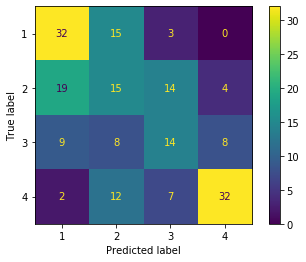

In [181]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
plot_confusion_matrix(logm,X_test,y_test)

In [183]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

dtree_pred = dtree.predict(X_test)
print(confusion_matrix(y_test,dtree_pred))
print(classification_report(y_test,dtree_pred))

[[43  2  4  1]
 [ 8 22 17  5]
 [ 2  6 18 13]
 [ 2  8 14 29]]
              precision    recall  f1-score   support

           1       0.78      0.86      0.82        50
           2       0.58      0.42      0.49        52
           3       0.34      0.46      0.39        39
           4       0.60      0.55      0.57        53

    accuracy                           0.58       194
   macro avg       0.58      0.57      0.57       194
weighted avg       0.59      0.58      0.58       194



Text(0, 0.5, 'Accuracy Score')

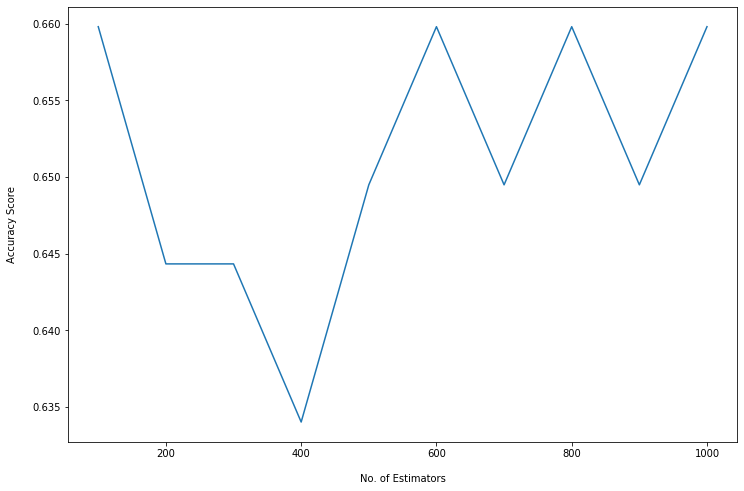

In [188]:
from sklearn.ensemble import RandomForestClassifier
scores = []
for i in np.arange(100,1001,100):
    rf = RandomForestClassifier(n_estimators=i)
    rf.fit(X_train,y_train)
    scores.append(rf.score(X_test,y_test))
    
    

plt.figure(figsize=(12,8))
sns.lineplot(np.arange(100,1001,100),scores)
plt.xlabel('No. of Estimators',labelpad=15)
plt.ylabel('Accuracy Score',labelpad=15)

In [189]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred))




[[45  1  3  1]
 [ 5 27 16  4]
 [ 7  3 20  9]
 [ 1  4 15 33]]
              precision    recall  f1-score   support

           1       0.78      0.90      0.83        50
           2       0.77      0.52      0.62        52
           3       0.37      0.51      0.43        39
           4       0.70      0.62      0.66        53

    accuracy                           0.64       194
   macro avg       0.65      0.64      0.64       194
weighted avg       0.67      0.64      0.65       194



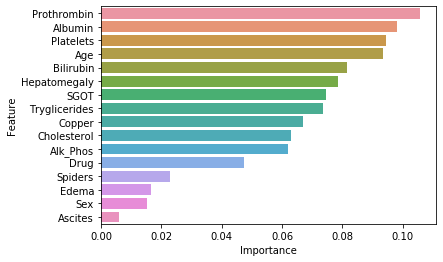

In [190]:
feature_importances = pd.concat([pd.Series(features),pd.Series(rf.feature_importances_)],axis=1)
feature_importances.columns = ['Feature','Importance']
feature_importances = feature_importances.sort_values('Importance',ascending=False)
sns.barplot(x='Importance',y='Feature',data=feature_importances,orient='h')


In [191]:
hgb = HistGradientBoostingClassifier()
hgb.fit(X_train,y_train)

hgb_pred = hgb.predict(X_test)
print(confusion_matrix(y_test,hgb_pred))
print(classification_report(y_test,hgb_pred))


[[45  1  3  1]
 [ 1 24 16 11]
 [ 5  4 21  9]
 [ 1  9 14 29]]
              precision    recall  f1-score   support

           1       0.87      0.90      0.88        50
           2       0.63      0.46      0.53        52
           3       0.39      0.54      0.45        39
           4       0.58      0.55      0.56        53

    accuracy                           0.61       194
   macro avg       0.62      0.61      0.61       194
weighted avg       0.63      0.61      0.61       194



In [192]:
cb = CatBoostClassifier()
cb.fit(X_train,y_train)

cb_pred = cb.predict(X_test)
print(confusion_matrix(y_test,cb_pred))
print(classification_report(y_test,cb_pred))


Learning rate set to 0.075969
0:	learn: 1.3598347	total: 198ms	remaining: 3m 17s
1:	learn: 1.3341053	total: 223ms	remaining: 1m 51s
2:	learn: 1.3085663	total: 246ms	remaining: 1m 21s
3:	learn: 1.2865235	total: 268ms	remaining: 1m 6s
4:	learn: 1.2679724	total: 292ms	remaining: 58.1s
5:	learn: 1.2422762	total: 313ms	remaining: 51.9s
6:	learn: 1.2231386	total: 335ms	remaining: 47.6s
7:	learn: 1.2031651	total: 349ms	remaining: 43.2s
8:	learn: 1.1822272	total: 359ms	remaining: 39.5s
9:	learn: 1.1673232	total: 368ms	remaining: 36.4s
10:	learn: 1.1514546	total: 378ms	remaining: 34s
11:	learn: 1.1347564	total: 393ms	remaining: 32.3s
12:	learn: 1.1212110	total: 403ms	remaining: 30.6s
13:	learn: 1.1063475	total: 413ms	remaining: 29.1s
14:	learn: 1.0917680	total: 423ms	remaining: 27.8s
15:	learn: 1.0790099	total: 432ms	remaining: 26.6s
16:	learn: 1.0638608	total: 442ms	remaining: 25.6s
17:	learn: 1.0536658	total: 451ms	remaining: 24.6s
18:	learn: 1.0419202	total: 460ms	remaining: 23.8s
19:	learn:

In [194]:
et = ExtraTreesClassifier()
et.fit(X_train,y_train)

et_pred = et.predict(X_test)
print(confusion_matrix(y_test,et_pred))
print(classification_report(y_test,et_pred))

[[49  0  1  0]
 [ 6 28 15  3]
 [ 7  3 19 10]
 [ 1  8 18 26]]
              precision    recall  f1-score   support

           1       0.78      0.98      0.87        50
           2       0.72      0.54      0.62        52
           3       0.36      0.49      0.41        39
           4       0.67      0.49      0.57        53

    accuracy                           0.63       194
   macro avg       0.63      0.62      0.62       194
weighted avg       0.65      0.63      0.63       194



In [201]:
print("Accuracy Score of Cat Boost Classifier:",str(np.round(cb.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Random Forest Classifier:",str(np.round(rf.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Extra Trees Classifier:",str(np.round(et.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Logistic Regression:",str(np.round(logm.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Histogram Gradient Boosting Classifier:",str(np.round(hgb.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Decision Tree Classifier:",str(np.round(dtree.score(X_test,y_test)*100,2)) + '%')

Accuracy Score of Cat Boost Classifier: 67.53%
Accuracy Score of Random Forest Classifier: 64.43%
Accuracy Score of Extra Trees Classifier: 62.89%
Accuracy Score of Logistic Regression: 47.94%
Accuracy Score of Histogram Gradient Boosting Classifier: 61.34%
Accuracy Score of Decision Tree Classifier: 57.73%


## Cat Boost Classifier gives high accuracy 